## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [25]:
import pandas as pd

In [26]:
## Data Ingestions step
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [27]:
df.count()

id         9999
carat      9999
cut        9999
color      9999
clarity    9999
depth      9999
table      9999
x          9999
y          9999
z          9999
price      9999
dtype: int64

In [28]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [29]:
### No missing values present in the data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       9999 non-null   int64  
 1   carat    9999 non-null   float64
 2   cut      9999 non-null   object 
 3   color    9999 non-null   object 
 4   clarity  9999 non-null   object 
 5   depth    9999 non-null   float64
 6   table    9999 non-null   float64
 7   x        9999 non-null   float64
 8   y        9999 non-null   float64
 9   z        9999 non-null   float64
 10  price    9999 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 859.4+ KB


In [31]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [32]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [33]:
## check for duplicated records
df.duplicated().sum()

0

In [34]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [35]:
df[categorical_columns].describe()

,cut,color,clarity
count,9999,9999,9999
unique,5,7,8
top,Ideal,G,SI1
freq,4788,2333,2717


In [36]:
df['cut'].value_counts()

cut
Ideal        4788
Premium      2590
Very Good    1930
Good          579
Fair          112
Name: count, dtype: int64

In [37]:
df['color'].value_counts()

color
G    2333
E    1816
F    1726
H    1609
D    1310
I     896
J     309
Name: count, dtype: int64

In [38]:
df['clarity'].value_counts()

clarity
SI1     2717
VS2     2426
SI2     1619
VS1     1598
VVS2     825
VVS1     561
IF       219
I1        34
Name: count, dtype: int64

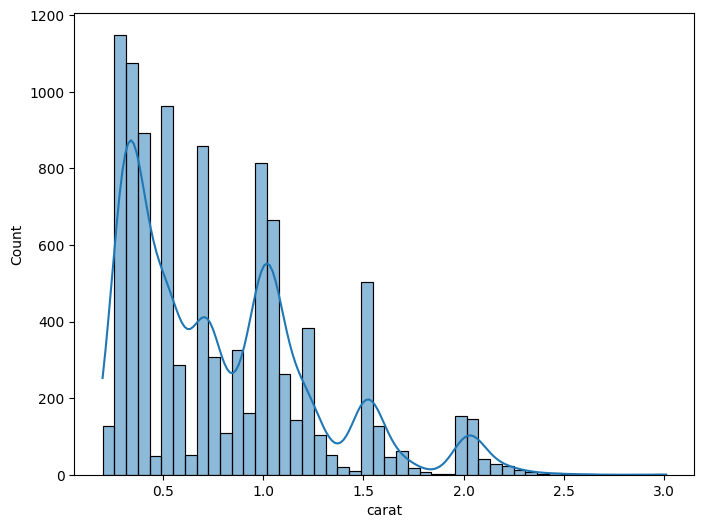

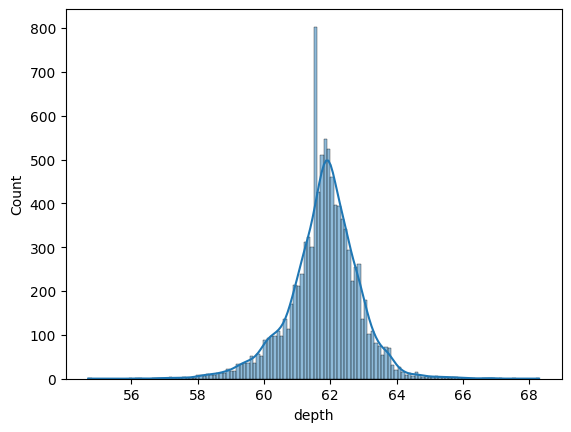

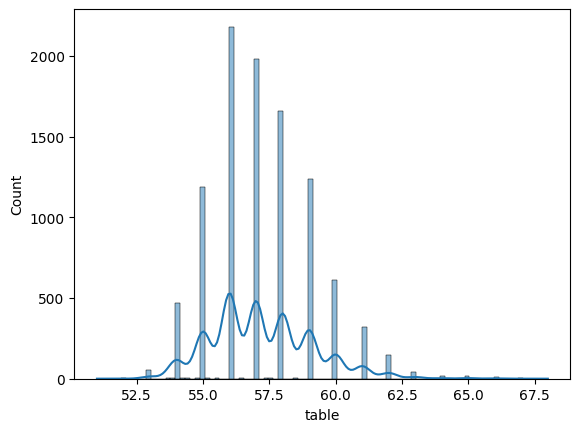

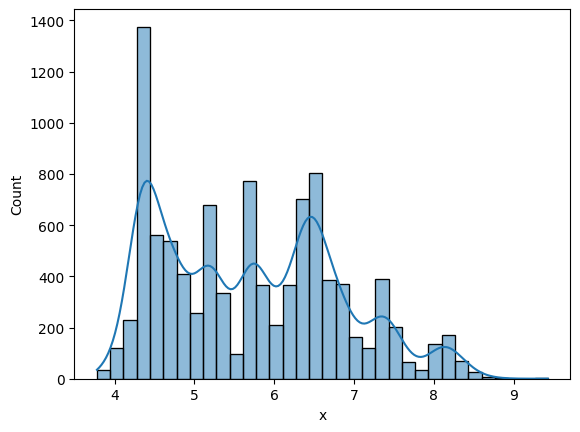

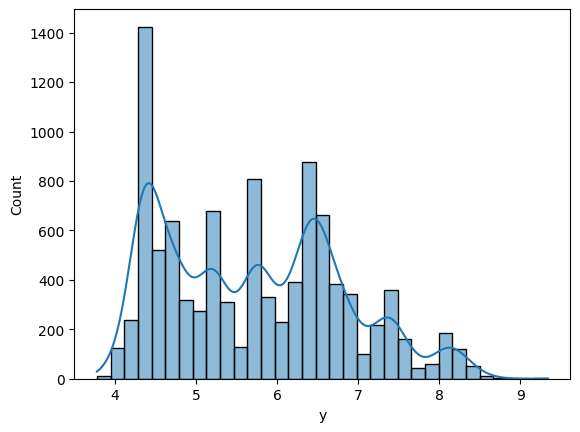

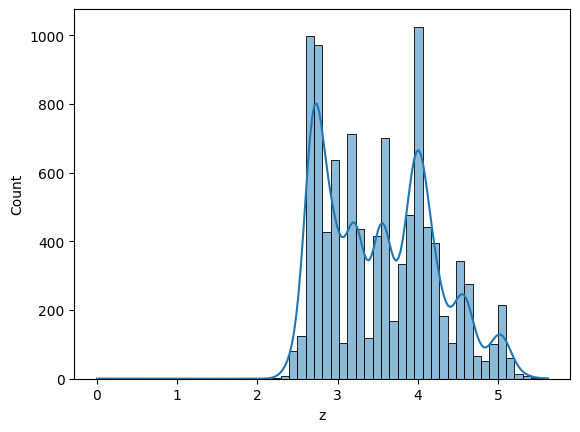

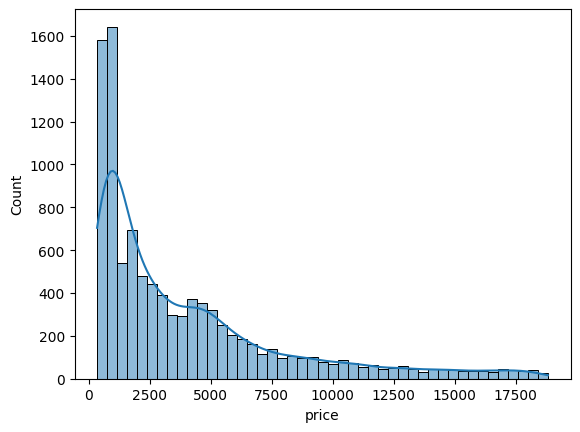

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [40]:
## Assignment Do the same for categorical data

<Axes: >

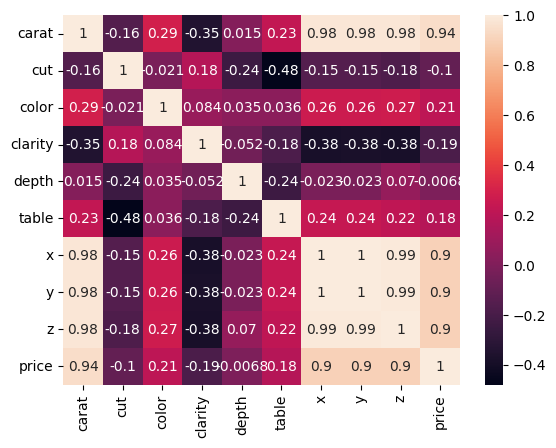

In [51]:
## correlation
sns.heatmap(df.corr(),annot=True)

In [52]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

In [53]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [54]:
df['cut'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [55]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [56]:
df['clarity'].unique()

array([4, 2, 5, 3, 8, 6, 7, 1], dtype=int64)

In [57]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [58]:
df['color'].unique()

array([3, 7, 4, 2, 1, 5, 6], dtype=int64)

In [59]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [60]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [61]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,NaN,NaN,NaN,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,NaN,NaN,NaN,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,NaN,NaN,NaN,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,NaN,NaN,NaN,61.6,56.0,4.38,4.41,2.71,666
4,1.70,NaN,NaN,NaN,62.6,59.0,7.65,7.61,4.77,14453
